# Restaurant Food Cost

**Project Description:**

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict the cost of a two person meal.

**Dataset Attributes:**
TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
RESTAURANT_ID: A unique ID for each restaurant.
CUISINES: The variety of cuisines that the restaurant offers.
TIME: The open hours of the restaurant.
CITY: The city in which the restaurant is located.
LOCALITY: The locality of the restaurant.
RATING: The average rating of the restaurant by customers.
VOTES: The overall votes received by the restaurant.
COST: The average cost of a two-person meal.

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Restaurant%20Food%20Cost

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Test.xlsx
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_excel('C://Users//rahul//OneDrive//Desktop//data trained//internship//Sample project//Pro ph 4//Restaurant Food Cost//Data_Train.xlsx')
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
df_test = pd.read_excel('C://Users//rahul//OneDrive//Desktop//data trained//internship//Sample project//Pro ph 4//Restaurant Food Cost//Data_Test.xlsx')
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [4]:
df_train.shape

(12690, 9)

In [5]:
df_test.shape

(4231, 8)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [8]:
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

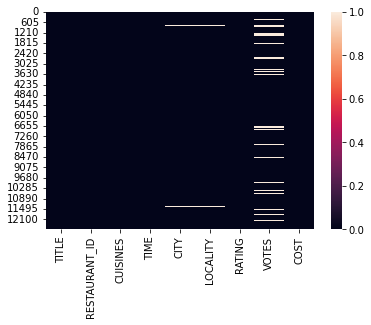

In [9]:
sns.heatmap(df_train.isnull())
plt.show()

In [10]:
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

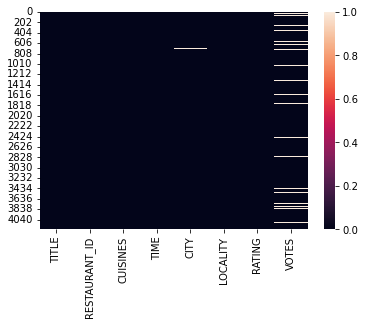

In [11]:
sns.heatmap(df_test.isnull())
plt.show()

<AxesSubplot:>

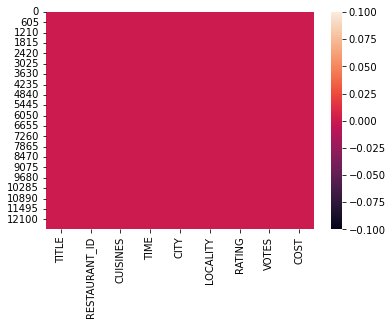

In [12]:
#filling mussing value
df_train.fillna(method='ffill', inplace=True)
sns.heatmap(df_train.isnull())

<AxesSubplot:>

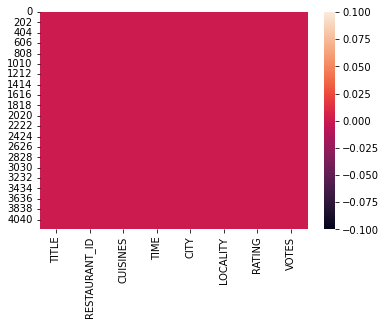

In [13]:
# filling missing values for test
df_test.fillna(method='ffill', inplace=True)
sns.heatmap(df_test.isnull())

In [14]:
# encoding categorical columns
from sklearn.preprocessing import OneHotEncoder

In [15]:
cat_col = ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']

In [16]:
# Initialize OneHotEncoder
ohen = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [17]:
# Fit and transform the training data
train_encoded = ohen.fit_transform(df_train[cat_col])
test_encoded = ohen.transform(df_test[cat_col])

In [18]:
# Convert encoded features back to DataFrame
df_train_encoded = pd.DataFrame(train_encoded, columns=ohen.get_feature_names_out(cat_col))
df_test_encoded = pd.DataFrame(test_encoded, columns=ohen.get_feature_names_out(cat_col))

In [19]:
# Concatenate with original dataframes (by dropping original categorical columns)
x_train = pd.concat([df_train.drop(columns=cat_col), df_train_encoded], axis=1)
x_test = pd.concat([df_test.drop(columns=cat_col), df_test_encoded], axis=1)

In [26]:
# Ensure index alignment
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

# Features and target variable
features = [col for col in x_train.columns if col != 'COST']
target = 'COST'
y_train = df_train[target].reset_index(drop=True)

In [27]:
x_train.dtypes

RESTAURANT_ID                             int64
RATING                                   object
VOTES                                    object
COST                                      int64
TITLE_BAKERY                            float64
                                         ...   
LOCALITY_rajendra nagar                 float64
LOCALITY_seawoods grand central mall    float64
LOCALITY_sector 42                      float64
LOCALITY_shop 7 shikrupa socity         float64
LOCALITY_shop no. 3 Sector 22           float64
Length: 8736, dtype: object

In [ ]:
# Convert all features to numeric types
x_train[features] = x_train[features].apply(pd.to_numeric, errors='coerce')
x_test[features] = x_test[features].apply(pd.to_numeric, errors='coerce')

# Check for infinite values and replace with NaN
x_train[features].replace([np.inf, -np.inf], np.nan, inplace=True)
x_test[features].replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill any remaining NaN values
x_train.fillna(0, inplace=True)
x_test.fillna(0, inplace=True)

In [ ]:
# Check for any non-numeric columns and print them
non_numeric_cols_train = x_train[features].select_dtypes(exclude=[int, float]).columns
non_numeric_cols_test = x_test[features].select_dtypes(exclude=[int, float]).columns
print("Non-numeric columns in X_train:", non_numeric_cols_train)
print("Non-numeric columns in X_test:", non_numeric_cols_test)

In [ ]:
# Ensure no missing values
print("Missing values in X_train:", x_train[features].isnull().sum().sum())
print("Missing values in X_test:", x_test[features].isnull().sum().sum())

# Ensure correct shapes
print("Shape of X_train:", x_train[features].shape)
print("Shape of y_train:", y_train.shape)

# Check for duplicates
print("Duplicate rows in X_train:", x_train.duplicated().sum())
print("Duplicate rows in X_test:", x_test.duplicated().sum())

In [ ]:
#model bulding
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Train the model: Linear Regression
try:
    model = LinearRegression()
    model.fit(x_train[features], y_train)
    print("Model training successful.")
except Exception as e:
    print(f"Error during model training: {e}")

# Make predictions
try:
    y_train_pred = model.predict(x_train[features])
    y_test_pred = model.predict(x_test[features])
    print("Prediction successful.")
except Exception as e:
    print(f"Error during prediction: {e}")

In [ ]:
# Train the model: Decision Tree regression
try:
    model = DecisionTreeRegressor()
    model.fit(x_train[features], y_train)
    print("Model training successful.")
except Exception as e:
    print(f"Error during model training: {e}")

# Make predictions
try:
    y_train_pred = model.predict(x_train[features])
    y_test_pred = model.predict(x_test[features])
    print("Prediction successful.")
except Exception as e:
    print(f"Error during prediction: {e}")

In [ ]:
# Train the model
try:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train[features], y_train)
    print("Model training successful.")
except Exception as e:
    print(f"Error during model training: {e}")

# Make predictions
try:
    y_train_pred = model.predict(X_train[features])
    y_test_pred = model.predict(X_test[features])
    print("Prediction successful.")
except Exception as e:
    print(f"Error during prediction: {e}")